In [ ]:
#Aim:To Check whether obesity or normal or underweight

In [ ]:

#Loading dataset
import pandas as pd

df=pd.read_csv("/content/Obesity Classification.csv")
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [ ]:
df.dtypes

,0
ID,int64
Age,int64
Gender,int64
Height,int64
Weight,int64
BMI,float64
Label,object


In [ ]:
df["Gender"]=df["Gender"].replace({"Male":1, "Female":0})
df. head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese


In [ ]:
df.shape

(108, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    int64  
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [12]:
df.describe ()

,ID,Age,Gender,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,0.518519,166.574074,59.490741,20.549074
std,31.917939,24.720620,0.501986,27.873615,28.856233,7.583818
min,1.000000,11.000000,0.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,0.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,1.000000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,1.000000,190.000000,85.000000,26.100000
max,110.000000,112.000000,1.000000,210.000000,120.000000,37.200000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Label"].value_counts()

,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


In [ ]:
df["Gender"].value_counts()

,count
Gender,
1,56
0,52


In [ ]:
df[df["Label"]=="Obese"][["Age","Weight","Gender"]]

,Age,Weight,Gender
4,45,100,1
6,55,110,1
8,65,120,1
16,48,100,1
18,58,110,1
24,88,100,1
26,98,110,1
28,108,120,1
34,49,105,1
36,59,115,1


In this dataset All obese person's  weight >=100 ang age >=45 everyone is men

In [ ]:
df.groupby("Label")[["Height","Weight","BMI"]].agg(["mean", "max","min"]).reset_index()

Label      Height                Weight                  BMI        \
                        mean  max  min        mean  max  min       mean   max   
0  Normal Weight  166.724138  210  120   65.172414   80   55  22.834483  25.3   
1          Obese  203.333333  210  190  108.333333  120  100  32.341667  37.2   
2     Overweight  166.500000  210  120   86.250000   95   75  26.600000  29.1   
3    Underweight  157.127660  210  120   32.127660   50   10  13.553191  20.0   

         
    min  
0  21.2  
1  28.9  
2  25.0  
3   3.9

In [ ]:
df.groupby("Gender")["Label"].value_counts ()

Gender  Label        
0       Underweight      32
        Normal Weight    12
        Overweight        8
1       Normal Weight    17
        Underweight      15
        Obese            12
        Overweight       12
Name: count, dtype: int64

In [16]:
sum(df["Age"]>25)

84


Under weight:1,
Normal:2,
Over weight:3,
Obese:4

In [ ]:
df["Label"]=df["Label"].replace({"Normal Weight":"2","Overweight":3,"Underweight":1,"Obese":4})

In [ ]:

#df = pd.get_dummies(df, columns=['Label'])

# Now compute correlation
corr_matrix = df.corr()

In [ ]:
#from sklearn.preprocessing import LabelEncoder

# Assuming 'WeightCategory' is the column with string values like 'Normal Weight'
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

# Now you can compute correlation
corr_matrix = df.corr()

KeyError: 'Label'

In [ ]:
df["Label"].astype(int)

,Label
0,2
1,2
2,3
3,1
4,4
...,...
103,1
104,1
105,1
106,1


In [ ]:
df.corr()

ValueError: could not convert string to float: 'Normal Weight'

In [20]:
import seaborn as sns
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Normal Weight'

In [ ]:
x=df.drop(columns=["Label"])
x=df[["Height","BMI"]]
#x

by this we understood weight and bmi is important features for label

In [ ]:
y=df["Label"]
y

,Label
0,Normal Weight
1,Normal Weight
2,Overweight
3,Underweight
4,Obese
...,...
103,Underweight
104,Underweight
105,Underweight
106,Underweight


<Axes: xlabel='Label', ylabel='Weight'>

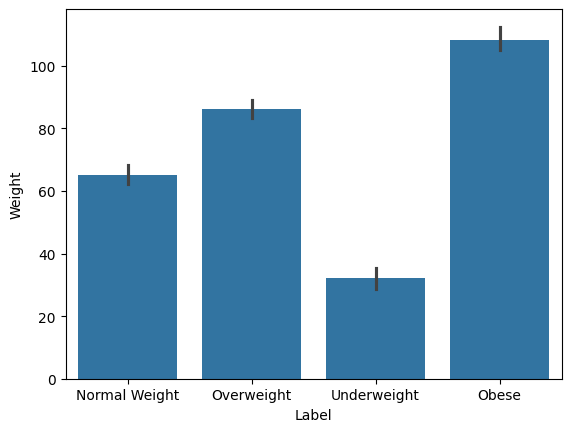

In [29]:


import matplotlib.pyplot as plt
sns.barplot(x="Label", y="Weight",data=df)

<Axes: xlabel='Label', ylabel='BMI'>

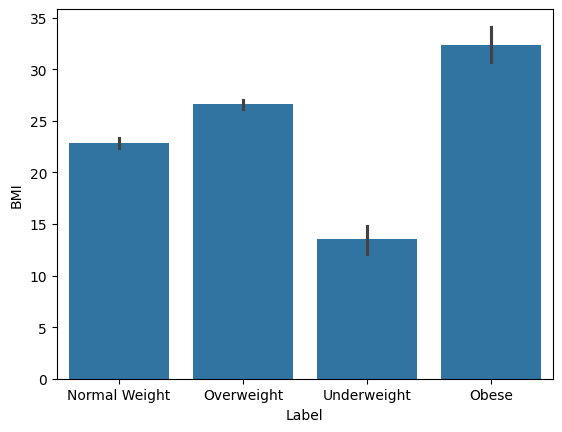

In [ ]:
sns.barplot(x="Label", y="BMI",data=df)

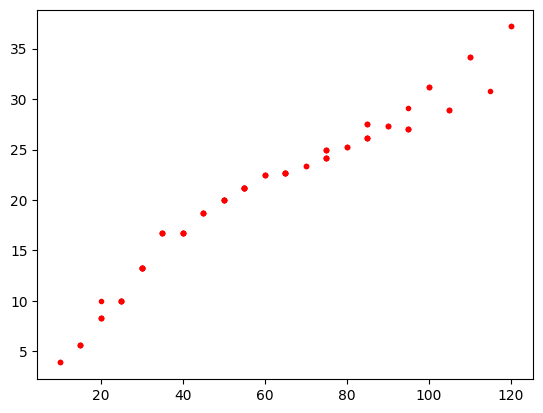

In [41]:
plt.scatter(x="Weight", y="BMI", data=df,color="red", marker=".")

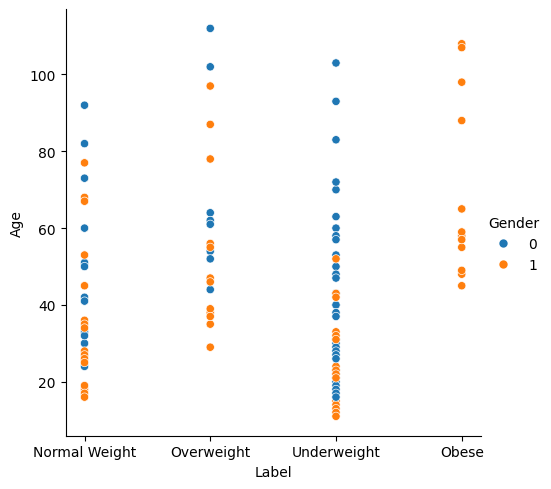

In [21]:
sns.relplot(x="Label", y="Age",hue="Gender", data=df)

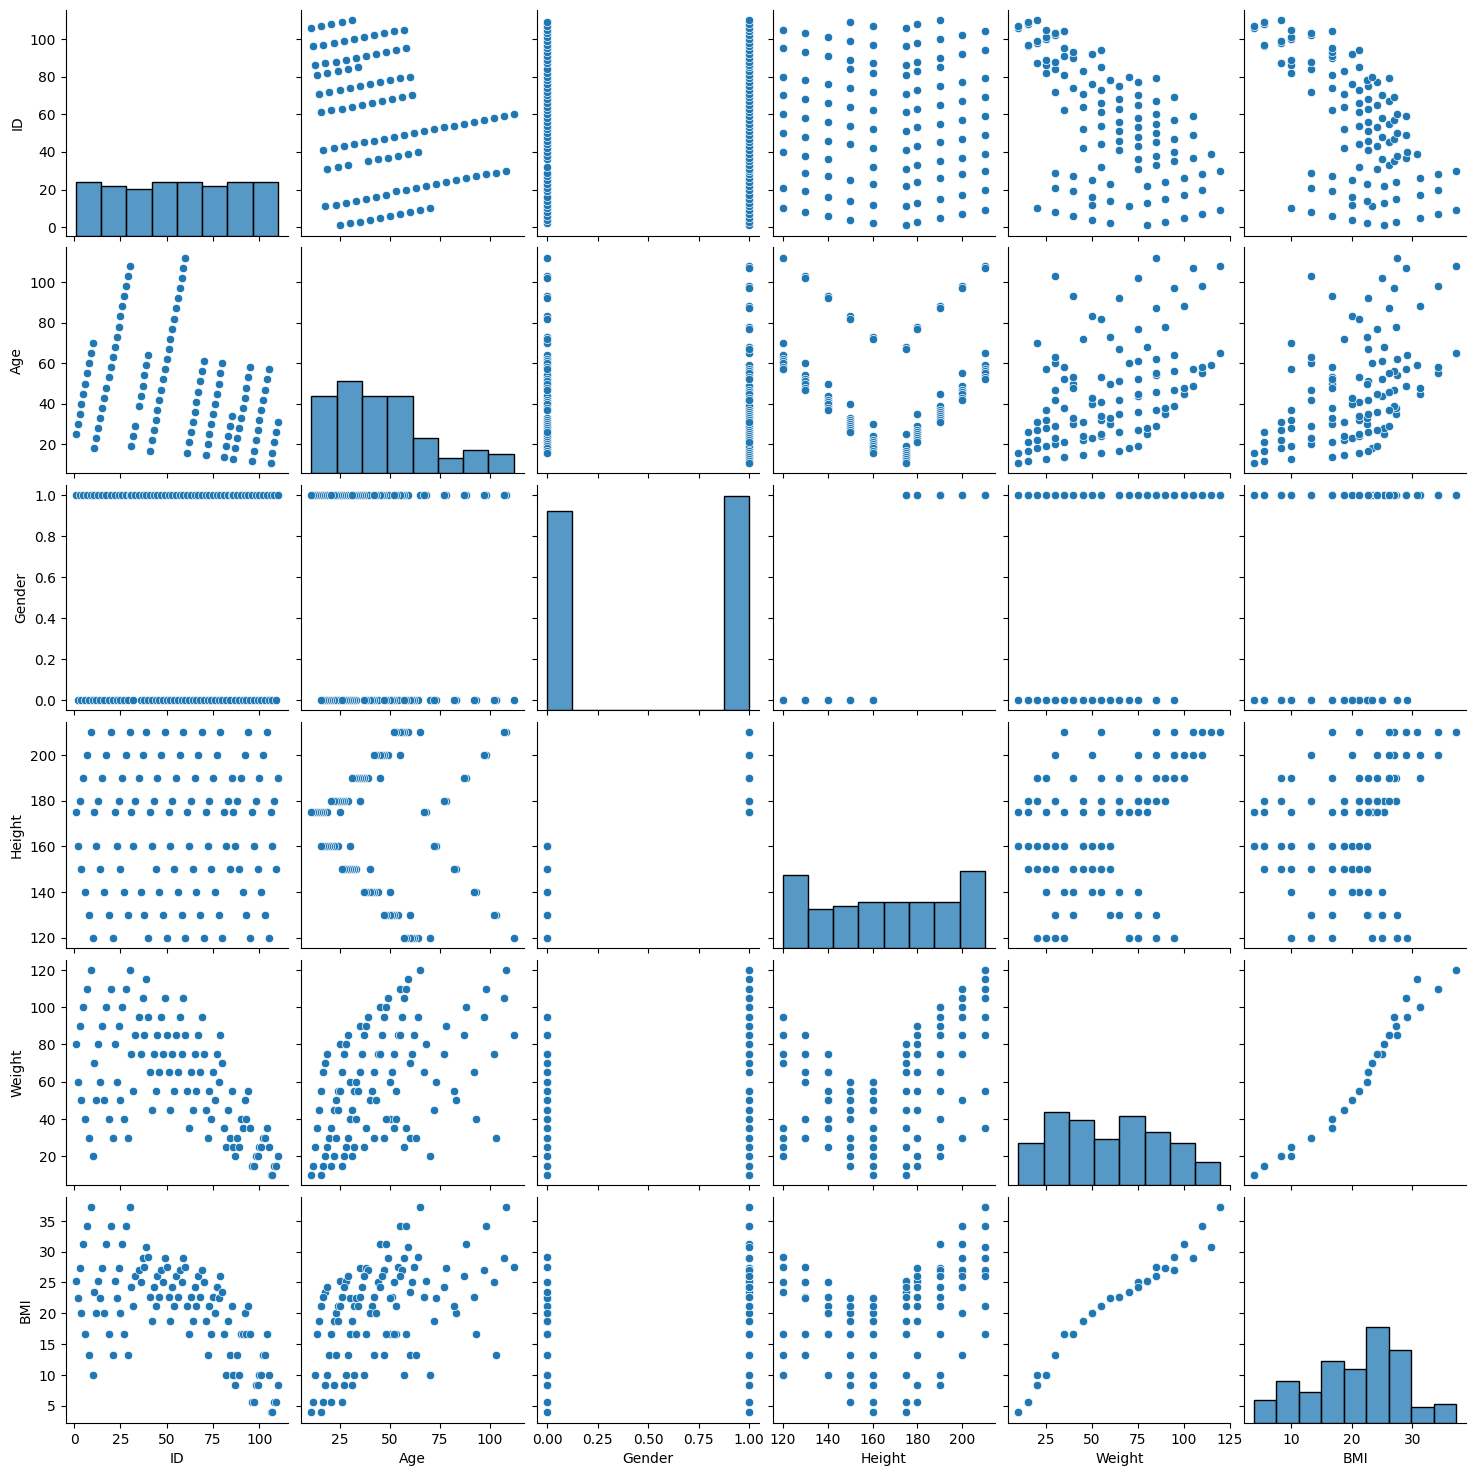

In [ ]:
sns.pairplot(df)

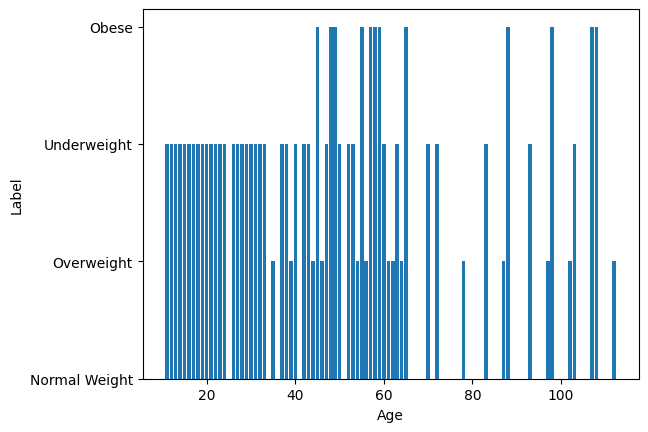

In [17]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
x= df["Age"]
y= df["Label"]

plt.xlabel("Age")
plt.ylabel("Label")
plt.bar(x, y)
plt.show()

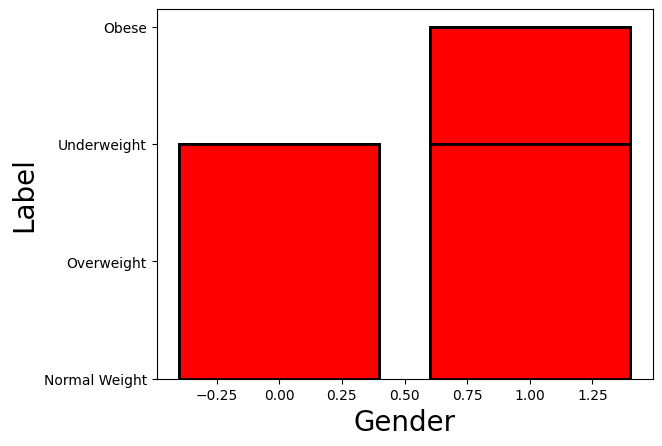

<Figure size 1000x200 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
x= df["Gender"]
y= df["Label"]

plt.xlabel("Gender",fontsize=20)
plt.ylabel("Label",fontsize=20)
plt.bar(x, y, color="red",edgecolor="black",linewidth=2)
plt.figure (figsize=(10,2),facecolor="black")
plt.show()

In [ ]:

#training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split (x, y, test_size=0.2,random_state=42)
x_train
#y_train
#x_test
#y_test

,Height,BMI
64,200,26.1
26,200,34.2
22,180,27.3
31,180,26.1
47,120,27.5
...,...,...
71,150,16.7
14,190,27.3
92,120,16.7
51,150,21.2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=108)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

In [ ]:
#Model evaluation
from sklearn. metrics import accuracy_score , classification_report
print("Decision Tree Classifier")
print("Accuracy ",accuracy_score(y_test,y_predict) )
#print("Y predict ",y_predict)
#print(" Y test", y_test)
print("Classification Report:")
print(classification_report(y_test,y_predict))

Decision Tree Classifier
Accuracy  1.0
Classification Report:
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



In [ ]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
#print("Y predict ",rf_y_pred)
#print(" Y test", y_test)
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Classifier:
Accuracy: 0.9545454545454546
Classification Report:
               precision    recall  f1-score   support

Normal Weight       1.00      0.83      0.91         6
        Obese       1.00      1.00      1.00         4
   Overweight       0.80      1.00      0.89         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           0.95        22
    macro avg       0.95      0.96      0.95        22
 weighted avg       0.96      0.95      0.96        22



In [ ]:

#Decision tree
# Make prediction
input_data = [[109, 19, 1, 165, 70, 25.7]]
prediction = Model.predict(input_data)
proba = Model.predict_proba(input_data)
# Get class labels
class_labels = Model.classes_
# Print prediction and accuracy
predicted_class = prediction[0]
print("Prediction:", predicted_class)
index = list(class_labels).index(predicted_class)
print("Accuracy:", proba[0][index] * 100, "%")

Prediction: Overweight
Accuracy: 100.0 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Random Forest
# Make prediction
input_data = [[109, 19, 1, 165, 70, 25.7]]
prediction = rf_model.predict(input_data)
proba = rf_model.predict_proba(input_data)
# Get class labels
class_labels = rf_model.classes_
# Print prediction and accuracy
predicted_class = prediction[0]
print("Prediction:", predicted_class)
index = list(class_labels).index(predicted_class)
print("Accuracy:", proba[0][index] * 100, "%")

Prediction: Normal Weight
Accuracy: 50.0 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
Model=DecisionTreeClassifier ()
Model.fit(x_train,y_train)

y_predict=Model.predict(x_test)
print("Y predict ",y_predict)
print(" Y test", y_test)

In [ ]:
from sklearn. metrics import accuracy_score
print("Accuracy ",accuracy_score(y_test,y_predict) )

In [ ]:

# Make prediction

input_data = [[109, 19, 1, 165, 70, 25.7]]

prediction = Model.predict(input_data)

proba = Model.predict_proba(input_data)

# Get class labels

class_labels = Model.classes_

# Print prediction and accuracy

predicted_class = prediction[0]

print("Prediction:", predicted_class)

index = list(class_labels).index(predicted_class)

print("Accuracy:", proba[0][index] * 100, "%")